In [36]:
!pip install yfinance
import yfinance as yf

In [37]:
from pandas_datareader import data as pdr
yf.pdr_override() 
asset = pdr.get_data_yahoo("MSFT", start="1986-03-13", end="2020-08-10")

[*********************100%***********************]  1 of 1 completed


In [38]:
import numpy as np

#returns = asset["Adj Close"].pct_change()
returns = np.log(asset["Adj Close"]).diff().dropna()

print("daily returns mean : " + str(returns.mean()))
print("daily returns standard deviation : " + str(returns.std()))

daily returns mean : 0.0009382112217800671
daily returns standard deviation : 0.02159447613283607


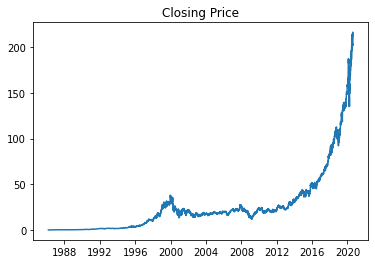

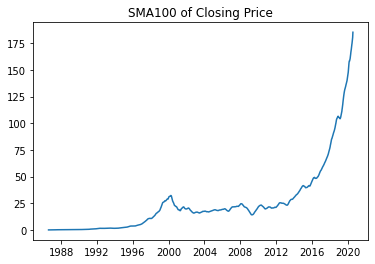

In [39]:
sma100 = asset["Adj Close"].rolling(window=100).mean()

import matplotlib.pyplot as plt

plt.title("Closing Price")
plt.plot(asset['Adj Close'])
plt.show()

plt.title("SMA100 of Closing Price")
plt.plot(sma100)
plt.show()

Check that there are at least 2000 data points:

In [40]:
assert returns.count() > 1999, "Insufficient asset history for the next test"
returns.count()

8672

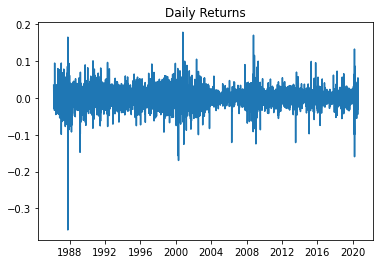

In [41]:
plt.title("Daily Returns")
plt.plot(returns)
plt.show()

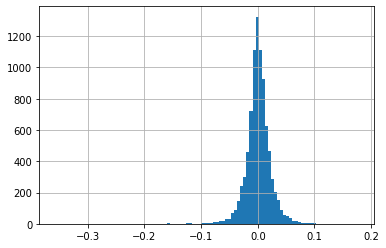

In [42]:
returns.hist(bins=100)

In [51]:
from scipy import stats
#test1 = stats.normaltest(returns)
jb, p = stats.jarque_bera(returns)
print(jb)
print("p value = " + str(p))
if (p < 0.05):
  print("the hypothesis for normal distribution is rejected")
else:
  print("the hypothesis for normal distribution is accepted")

83802.56623834255
p value = 0.0
the hypothesis for normal distribution is rejected


In [44]:
# for the correlation data we can use economic indicators but they are (mostly) 
#     monthly frequency so the number of observations will be reduced
# https://fred.stlouisfed.org/categories/
# https://databank.worldbank.org/reports.aspx?source=global-economic-monitor-%28gem%29
# for now just use another asset to get data

compareAsset = pdr.get_data_yahoo("AAPL", start="1986-03-13", end="2020-08-10")
compareReturns = np.log(compareAsset["Adj Close"]).diff().dropna()

[*********************100%***********************]  1 of 1 completed


In [45]:
import pandas as pd
data = pd.DataFrame(
    {'asset': returns,
     'indicator': compareReturns
    })
data.head()


,asset,indicator
Date,,
1986-03-14,0.035092,0.054067
1986-03-17,0.017095,-0.004796
1986-03-18,-0.025753,0.033100
1986-03-19,-0.017544,-0.014051
1986-03-20,-0.026908,0.063949


In [54]:
# a test based on Augmented Dickey Fuller:
# Engle-Granger cointegration test
from statsmodels.tsa.stattools import coint
t, p, crit = coint(data["indicator"], data["asset"])
print("critical values = " + str(crit))
print("t statistic = " + str(t))
print("p value = " + str(p))
if (t < crit[1]):
  print("the hypothesis for no cointegration is rejected")
else:
  print("the hypothesis for no cointegration is accepted")

critical values = [-3.8977035  -3.33683475 -3.04493916]
t statistic = -22.60409454682954
p value = 0.0
the hypothesis for no cointegration is rejected


In [47]:
# could use the improved version but it has a different output schema:
# Johansen test cointegration test
# from statsmodels.tsa.vector_ar.vecm import coint_johansen
# jt = coint_johansen(data, det_order=0, k_ar_diff=1)
